# SDXL LoRA Pipeline
Goal: create a pipeline to create and use LoRAs with SDXL

## Steps
- [x] run sdxl locally
- [ ] create a LoRA
- [ ] train a LoRA
- [ ] use a LoRA
- [ ] use LoRA for image to image generation

In [16]:
# test sdxl installation

# see: https://huggingface.co/docs/diffusers/en/using-diffusers/sdxl

from diffusers import StableDiffusionXLPipeline, StableDiffusionXLImg2ImgPipeline
import torch

pipeline = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")

Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 12.46it/s]


100%|██████████| 50/50 [00:16<00:00,  2.99it/s]


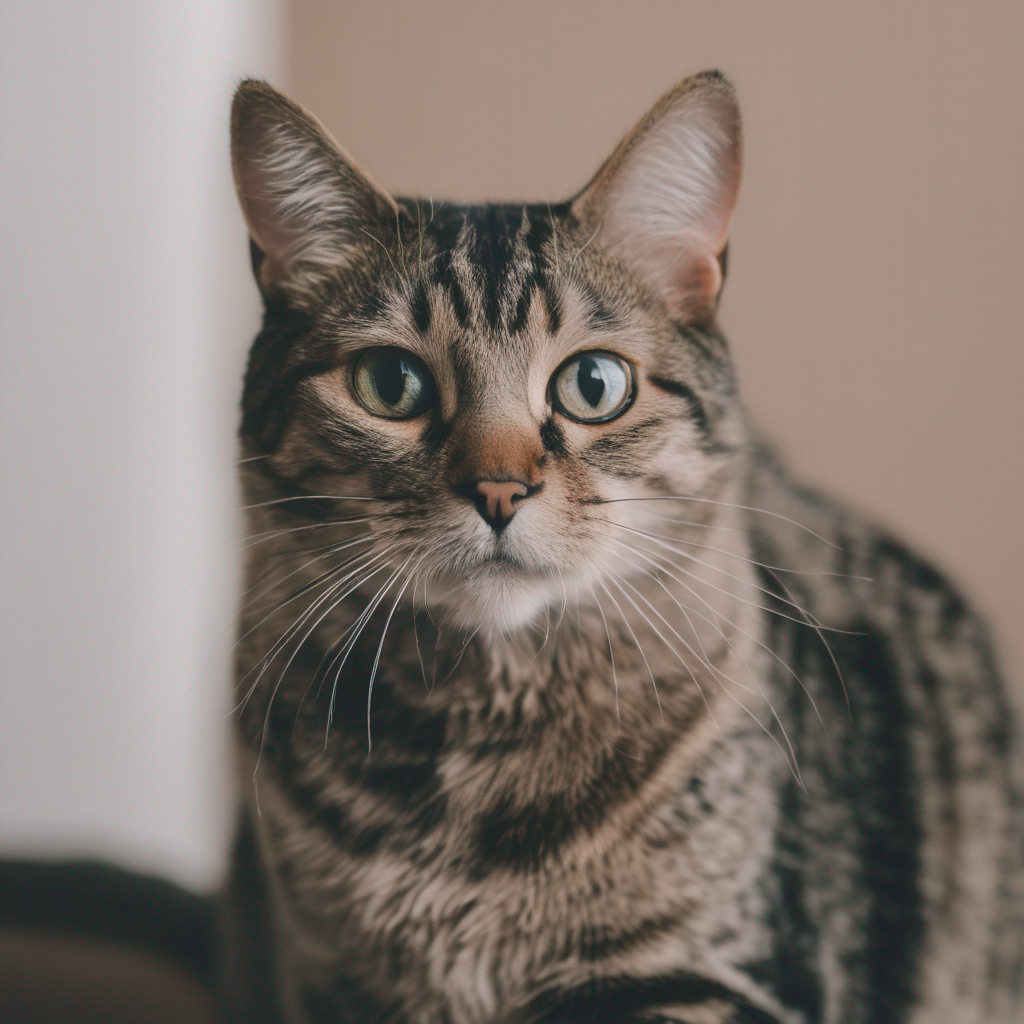

In [17]:
# text to image
text = "A photo of a cat"
output = pipeline(text)
img = output.images[0]
display(img)

In [18]:
# image to image
prompt = "A photo of a dog"
# use image of cat as input

from diffusers import StableDiffusionXLImg2ImgPipeline

pipeline = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
).to("cuda")



Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00, 12.23it/s]


100%|██████████| 8/8 [03:41<00:00, 27.63s/it]


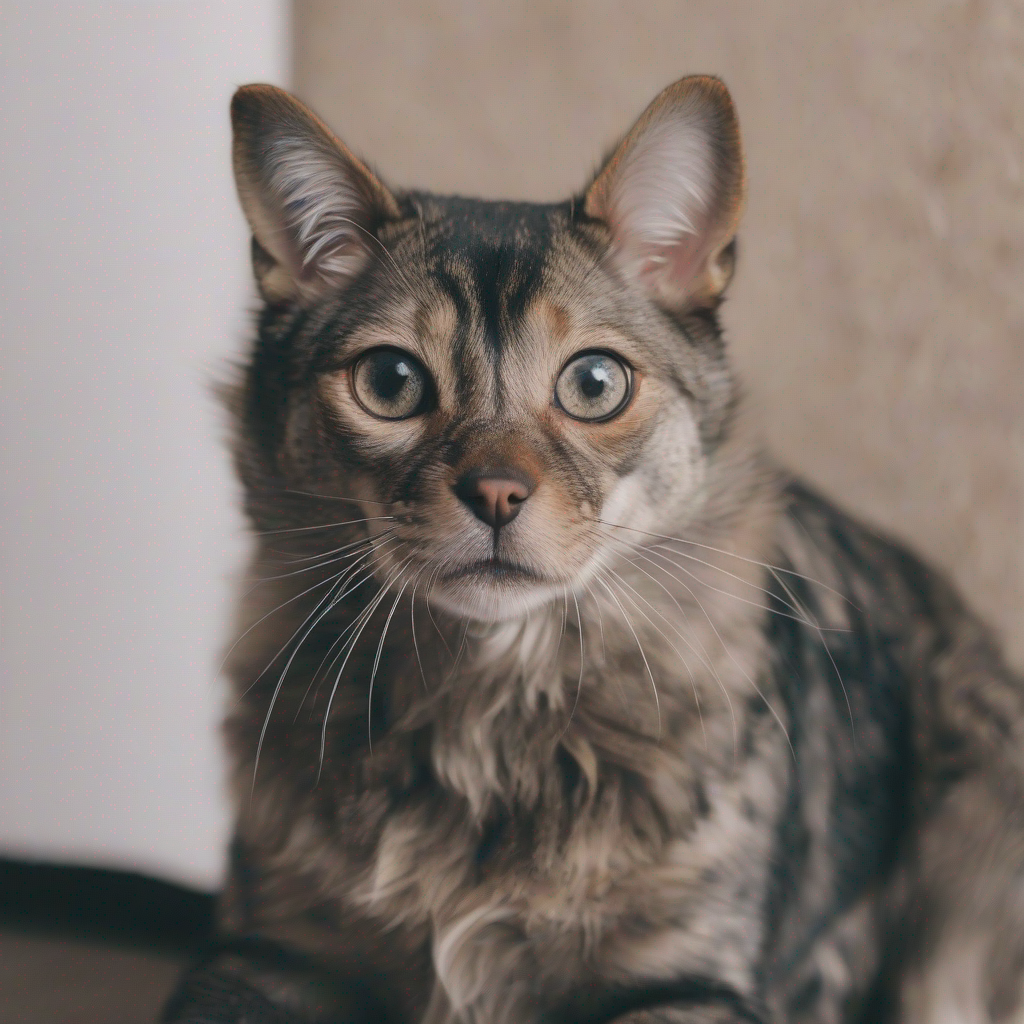

In [21]:
img2 = pipeline(prompt, strength=0.5, guidance_scale=6, num_inference_steps=16, image=img).images[0]
display(img2)

In [22]:
# does that look more like a dog? maybe a bit :D